In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [19]:
df = pd.read_csv('data/Past Trades.csv')

In [20]:
df = df.iloc[:,:15]
df = df.loc[df.Exc != 'Hiatus']
df = df.loc[~pd.isna(df['Buy date'])].reset_index(drop=True)
currency_cols = [i for i in df.columns if 'price' in i.lower() or 'profit' in i.lower() or 'amount' in i.lower()]

In [21]:
df['Buy date'] = pd.to_datetime(df['Buy date'], format='%d %b %y')
df['Sell date'] = pd.to_datetime(df['Sell date'], format='%d %b %y')
df['Buy date'] = pd.to_datetime(df['Buy date'], format='%d %b %y')
df['Sell date'] = pd.to_datetime(df['Sell date'], format='%d %b %y')
df[currency_cols] = df[currency_cols].replace('[$,]', '', regex=True).astype(float)

In [22]:
df.iloc[np.r_[:2,-2:0]]

,Exc,Code,Units,Buy price,Buy date,Buy amount,True buy amount,Sell price,Sell amount,True sell amount,Sell date,Profit,True Profit,Days,Actual\n%
0,NaN,GSK,106.0,36.86,2018-01-09,3906.63,3916.05,39.72,4210.32,4200.78,2018-04-05,303.69,284.73,86.0,7.29%
1,NaN,SBUX,100.0,57.45,2018-01-30,5745.00,5754.42,60.09,6009.00,5999.42,2018-04-12,264.00,245.00,72.0,4.26%
78,NASDAQ,MSFT,55.0,370.41,2023-12-08,20372.55,20374.88,NaN,0.00,NaN,NaT,0.00,0.00,0.0,0.00%
79,NYSE,BRK.B,68.0,355.45,2023-12-15,24170.60,24172.98,NaN,0.00,NaN,NaT,0.00,0.00,0.0,0.00%


In [48]:
buys = df[['True buy amount','Buy date', 'Code']].rename(columns={'Buy date': 'Date', 'True buy amount': 'Amount'})
sells = df[['True sell amount', 'Sell date', 'Code']].rename(columns={'Sell date': 'Date', 'True sell amount': 'Amount'}).dropna()
buys['Action'] = 1
sells['Action'] = -1
combined_df = pd.concat([buys,sells]).sort_values(by='Date').reset_index(drop=True)

In [50]:
value_invested, dates = [], []
for index, row in combined_df.iterrows():
    if index == 0:
        value_invested.append(row['Amount']*row['Action'])
        dates.append(row['Date'])
        continue
    if row['Date'] == dates[-1]:
        value_invested[-1] = value_invested[-1] + row['Amount']*row['Action']
        continue
    value_invested.append(value_invested[-1] + row['Amount']*row['Action'])
    dates.append(row['Date'])

In [53]:
value_invested

[3916.05,
 9670.470000000001,
 14395.890000000001,
 14535.120000000003,
 8535.700000000003,
 -994.6399999999976,
 7702.7800000000025,
 -1137.659999999998,
 5031.760000000002,
 9265.180000000002,
 12530.580000000002,
 7452.080000000002,
 -2888.349999999998,
 6114.2800000000025,
 321.7900000000027,
 15200.370000000003,
 7117.910000000003,
 -852.5499999999975,
 8221.640000000003,
 3933.1600000000035,
 9621.260000000004,
 9893.850000000006,
 13203.270000000006,
 11941.170000000006,
 12979.190000000006,
 12939.990000000005,
 2875.6300000000047,
 16814.050000000003,
 20402.590000000004,
 25129.610000000004,
 12046.120000000004,
 25091.280000000006,
 11760.990000000005,
 40897.060000000005,
 28324.980000000003,
 -3151.609999999997,
 -43592.12999999999,
 -28329.07999999999,
 -44289.31999999999,
 -44790.67999999999,
 -24255.639999999992,
 -45537.28999999999,
 -25871.889999999992,
 -26178.799999999996,
 -5974.3299999999945,
 -6429.929999999995,
 22682.420000000006,
 10303.240000000005,
 10121.51

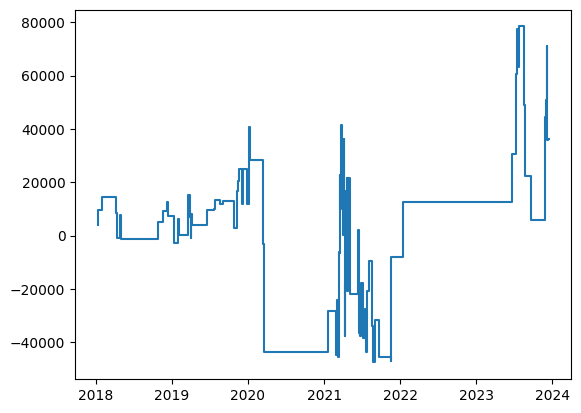

In [52]:
plt.step(dates, value_invested)
plt.show()

In [23]:
buys = []
sells = []
for index, row in df.iterrows():
    if index == 0:
        buys.append([row['True buy amount'], row['Buy date']])
        sells.append([row['True sell amount'], row['Sell date']])
        continue
    buys.append([row['True buy amount'] + buys[-1][0], row['Buy date']])
    if row['Sell date'] is not pd.NaT:
        sells.append([row['True sell amount'] + sells[-1][0], row['Sell date']])

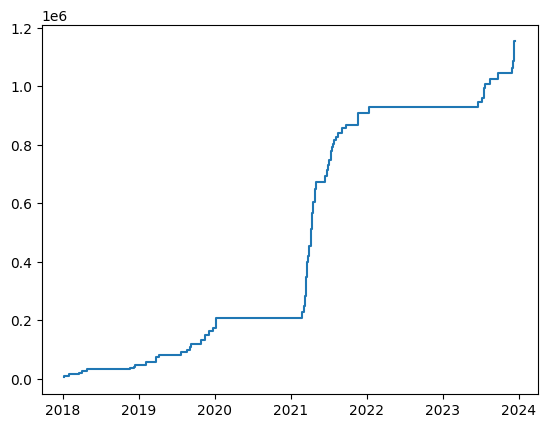

In [24]:
plt.step([i[1] for i in buys], [i[0] for i in buys])
plt.show()

In [25]:
buys

[[3916.05, Timestamp('2018-01-09 00:00:00')],
 [9670.470000000001, Timestamp('2018-01-30 00:00:00')],
 [14395.890000000001, Timestamp('2018-03-20 00:00:00')],
 [18735.9, Timestamp('2018-04-05 00:00:00')],
 [27433.32, Timestamp('2018-04-30 00:00:00')],
 [33602.74, Timestamp('2018-11-19 00:00:00')],
 [37836.159999999996, Timestamp('2018-12-10 00:00:00')],
 [41101.56, Timestamp('2018-12-14 00:00:00')],
 [46192.979999999996, Timestamp('2019-02-04 00:00:00')],
 [50104.189999999995, Timestamp('2019-02-04 00:00:00')],
 [57645.60999999999, Timestamp('2019-03-27 00:00:00')],
 [64982.76999999999, Timestamp('2019-03-27 00:00:00')],
 [74056.95999999999, Timestamp('2019-04-09 00:00:00')],
 [79745.06, Timestamp('2019-07-24 00:00:00')],
 [85122.73999999999, Timestamp('2019-07-26 00:00:00')],
 [86243.09, Timestamp('2019-07-26 00:00:00')],
 [89552.51, Timestamp('2019-08-21 00:00:00')],
 [98348.93, Timestamp('2019-09-05 00:00:00')],
 [107528.34999999999, Timestamp('2019-09-11 00:00:00')],
 [117073.01999

In [26]:
inflows = pd.Series(data=[i[0] for i in buys], index=[i[1] for i in buys], name='Inflow')
# outflows = pd.Series(data=[i[0] for i in sells], index=[i[1] for i in sells], name='Outflow')

In [27]:
inflows.index.duplicated(keep='last')
inflows.loc[~inflows.index.duplicated(keep='last')]

2018-01-09       3916.05
2018-01-30       9670.47
2018-03-20      14395.89
2018-04-05      18735.90
2018-04-30      27433.32
2018-11-19      33602.74
2018-12-10      37836.16
2018-12-14      41101.56
2019-02-04      50104.19
2019-03-27      64982.77
2019-04-09      74056.96
2019-07-24      79745.06
2019-07-26      86243.09
2019-08-21      89552.51
2019-09-05      98348.93
2019-09-11     107528.35
2019-10-28     117073.02
2019-11-14     131011.44
2019-11-18     143722.98
2019-12-05     148450.00
2019-12-26     161495.16
2020-01-10     190631.23
2021-02-26     205894.28
2021-03-04     226304.88
2021-03-10     246839.92
2021-03-12     266505.32
2021-03-15     283283.67
2021-03-16     303488.14
2021-03-17     331950.60
2021-03-18     376889.10
2021-03-22     387587.78
2021-03-23     399872.47
2021-03-28     418863.71
2021-03-31     440940.59
2021-04-06     454732.39
2021-04-07     471467.70
2021-04-08     490775.80
2021-04-12     511350.90
2021-04-13     529501.92
2021-04-14     548877.44


In [28]:
inflows

2018-01-09       3916.05
2018-01-30       9670.47
2018-03-20      14395.89
2018-04-05      18735.90
2018-04-30      27433.32
2018-11-19      33602.74
2018-12-10      37836.16
2018-12-14      41101.56
2019-02-04      46192.98
2019-02-04      50104.19
2019-03-27      57645.61
2019-03-27      64982.77
2019-04-09      74056.96
2019-07-24      79745.06
2019-07-26      85122.74
2019-07-26      86243.09
2019-08-21      89552.51
2019-09-05      98348.93
2019-09-11     107528.35
2019-10-28     117073.02
2019-11-14     131011.44
2019-11-18     143722.98
2019-12-05     148450.00
2019-12-26     161495.16
2020-01-10     172560.71
2020-01-10     190631.23
2021-02-26     205894.28
2021-03-04     226304.88
2021-03-10     246839.92
2021-03-12     266505.32
2021-03-15     283283.67
2021-03-16     303488.14
2021-03-17     312529.99
2021-03-17     331950.60
2021-03-18     347207.07
2021-03-18     357706.69
2021-03-18     376889.10
2021-03-22     387587.78
2021-03-23     399872.47
2021-03-28     418863.71


In [11]:
for index,value in outflows.items():
    

2018-01-09       3916.05
2018-01-30       9670.47
2018-03-20      14395.89
2018-04-05      18735.90
2018-04-30      27433.32
2018-11-19      33602.74
2018-12-10      37836.16
2018-12-14      41101.56
2019-02-04      46192.98
2019-02-04      50104.19
2019-03-27      57645.61
2019-03-27      64982.77
2019-04-09      74056.96
2019-07-24      79745.06
2019-07-26      85122.74
2019-07-26      86243.09
2019-08-21      89552.51
2019-09-05      98348.93
2019-09-11     107528.35
2019-10-28     117073.02
2019-11-14     131011.44
2019-11-18     143722.98
2019-12-05     148450.00
2019-12-26     161495.16
2020-01-10     172560.71
2020-01-10     190631.23
2021-02-26     205894.28
2021-03-04     226304.88
2021-03-10     246839.92
2021-03-12     266505.32
2021-03-15     283283.67
2021-03-16     303488.14
2021-03-17     312529.99
2021-03-17     331950.60
2021-03-18     347207.07
2021-03-18     357706.69
2021-03-18     376889.10
2021-03-22     387587.78
2021-03-23     399872.47
2021-03-28     418863.71
